# Neural Language Models

In this practice, we will learn about Transformers and how to use them to solve a specific task. 

We will be working with a similar dataset as last week dealing with movies. This one consists 50K movie reviews extracted from IMDB.

I have provided two files, a training and evaluation file. We will evaluate different models on hugging face. As an extra task, you can train your own model with the training dataset.

Your task consists in:
- Load the dataset
- Explore the [Hugging Face library](https://huggingface.co/) and choose models for sentiment analysis
- Run, evaluate and compare at least two Hugging Face models

EXTRA: 
- Train your own model using the training dataset with your prefered algorithm and compare!

Can you try an answer questions such as:
- What model gives the best performance?
- Is is better to train your own model or use the ones online?
- What about computation time? Does it compensate?

Some tips:
- Run your notebook on GPU (Runtime > Change Runtime > GPU)
- It takes a long time to run (around 1h), if it takes a long time, you can simply reduce your data
- Instead of using "apply", use "[progress_apply](https://predictivehacks.com/?all-tips=how-to-add-a-progress-bar-to-pandas-apply)", which tracks your progress

## Loat the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Let's load the data
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', 100)

movies=pd.read_csv('/content/drive/MyDrive/Lab 8: Neural Language Models/P8_Neural_Language_Models_test.csv')
movies.head()

,review,sentiment
0,I watched this movie and the original Carlitos Way back to back. The difference between the two ...,negative
1,I can't really see how anyone can have any interest whatsoever in seeing this movie. A woman mee...,negative
2,The blend of biography with poetry and live action with animation makes this a true work of art....,positive
3,"The name (Frau) of the main character is the German word for ""Woman"". I don't know if that was i...",negative
4,This was an excellent show. It came on PBS back home in Chicago and I remember Cindy Herron (Fro...,positive


In [3]:
movies.shape

(1000, 2)

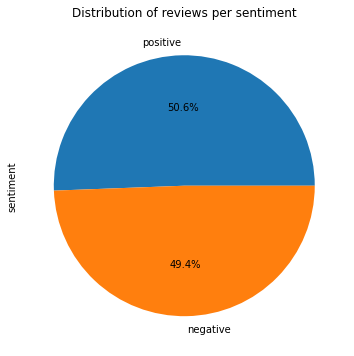

In [4]:
movies['sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['positive','negative'],autopct='%1.1f%%')

The test set contains 1000 movies.

## Hugging Face models

In [5]:
!pip install transformers
!pip install datasets

I have chosen two random sentiment analysis models that output positive and negative labels based on two different architectures, ROBERTA and DISTILBERT:


1.  [siebert/sentiment-roberta-large-english](https://huggingface.co/siebert/sentiment-roberta-large-english)
2.  [distilbert-base-uncased-finetuned-sst-2-english](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)



### Roberta-large

In [6]:
from transformers import pipeline

sentiment_roberta = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english", tokenizer="siebert/sentiment-roberta-large-english", max_length=512, truncation=True)

In [7]:
sentiment_roberta("I love this!")

[{'label': 'POSITIVE', 'score': 0.9988656044006348}]

We're only interested on the label.

In [8]:
sentiment_roberta("I love this!")[0]['label'].lower()

'positive'

In [12]:
def get_sentiment(model,text):
    return model(text)[0]['label'].lower()

In [10]:
from time import time  # To time our operations
from tqdm.notebook import tqdm_notebook # To track the progress

tqdm_notebook.pandas()

In [13]:
t = time()

movies['roberta'] = movies['review'].progress_apply(lambda row: get_sentiment(sentiment_roberta, row))

print('Time to get scores: {} mins'.format(round((time() - t) / 60, 2)))

  0%|          | 0/1000 [00:00<?, ?it/s]

Time to get scores: 46.56 mins


In [14]:
movies.head()

,review,sentiment,roberta
0,I watched this movie and the original Carlitos Way back to back. The difference between the two ...,negative,negative
1,I can't really see how anyone can have any interest whatsoever in seeing this movie. A woman mee...,negative,negative
2,The blend of biography with poetry and live action with animation makes this a true work of art....,positive,positive
3,"The name (Frau) of the main character is the German word for ""Woman"". I don't know if that was i...",negative,negative
4,This was an excellent show. It came on PBS back home in Chicago and I remember Cindy Herron (Fro...,positive,positive


In [15]:
movies.to_csv('/content/drive/MyDrive/Lab 8: Neural Language Models/P8_Neural_Language_Models_test_roberta.csv')

### Distilbert

In [16]:
sentiment_distilbert = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", tokenizer="distilbert-base-uncased-finetuned-sst-2-english", max_length=512, truncation=True)

In [17]:
sentiment_distilbert("I love this!")

[{'label': 'POSITIVE', 'score': 0.9998764991760254}]

In [18]:
t = time()

movies['distilbert'] = movies['review'].progress_apply(lambda row: get_sentiment(sentiment_distilbert, row))

print('Time to get scores: {} mins'.format(round((time() - t) / 60, 2)))

  0%|          | 0/1000 [00:00<?, ?it/s]

Time to get scores: 7.04 mins


In [19]:
movies.head()

,review,sentiment,roberta,distilbert
0,I watched this movie and the original Carlitos Way back to back. The difference between the two ...,negative,negative,negative
1,I can't really see how anyone can have any interest whatsoever in seeing this movie. A woman mee...,negative,negative,negative
2,The blend of biography with poetry and live action with animation makes this a true work of art....,positive,positive,positive
3,"The name (Frau) of the main character is the German word for ""Woman"". I don't know if that was i...",negative,negative,negative
4,This was an excellent show. It came on PBS back home in Chicago and I remember Cindy Herron (Fro...,positive,positive,positive


In [20]:
movies.to_csv('/content/drive/MyDrive/Lab 8: Neural Language Models/P8_Neural_Language_Models_test_distilbert.csv')

## Training your own model with Random Forest

In [21]:
# Load dataset
movies_train = pd.read_csv('/content/drive/MyDrive/Lab 8: Neural Language Models/P8_Neural_Language_Models_train.csv')
movies_train.shape

(4000, 2)

In [22]:
movies_train.head()

,review,sentiment
0,"Carlito Way, the original is a brilliant story about an ex-drug dealer who hopes to leave his cr...",negative
1,"""ASTONISHING"" Screams the LA Times from the front of the DVD box. They must have been referring ...",negative
2,"Perhaps it's me and my perverted ways, or the fact that I tend to have a very sick mind, but I r...",positive
3,"H.O.T.S. is not for those that want hardcore porn. Instead, this film is a precursor to many 80s...",positive
4,Why else would he do this to me?<br /><br />Not that I expect Dean Cain to produce hit movies. O...,negative


In [23]:
# Vectorize data (We are not splitting our data because we already have a evaluation set)
from sklearn.feature_extraction.text import TfidfVectorizer

#We initiate the vectorizer
tfdif_vectorizer = TfidfVectorizer()

#We fit and transform our clean dataset
tfidf = tfdif_vectorizer.fit_transform(movies_train['review'])

#We create a dataset with the results
tfidf_data=pd.DataFrame(tfidf.toarray())
tfidf_data.columns=tfdif_vectorizer.get_feature_names_out()

tfidf_data

,00,000,00001,0069,007,00am,01pm,02,04,06,07,08,09,10,100,1000,100bt,100th,100times,101,101st,102,105,106,107,108,10th,11,110,1100,1100ad,110mph,116,117,11th,12,120,123,129,12th,...,zolt,zombi,zombie,zombies,zombiez,zombification,zomcom,zonadvd,zone,zoned,zones,zoo,zoom,zooming,zooms,zor,zorkin,zorro,zosh,zu,zucco,zucker,zudina,zues,zulu,zuniga,zurich,zwart,zzzzzzzzzzzzzzzzzz,æon,ça,émigré,émigrés,était,étoile,être,ís,île,ïn,überwoman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.065735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# We will use Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)
rf_model = rf.fit(tfidf_data, movies_train['sentiment'])

In [25]:
def predict(text):
  vector = tfdif_vectorizer.transform(text)
  prediction = rf_model.predict(vector)
  return prediction[0]

In [26]:
predict(["I love this!"])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


'positive'

In [27]:
movies['randomforest'] = movies['review'].progress_apply(lambda row: predict([row]))

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

In [29]:
movies.head(10)

,review,sentiment,roberta,distilbert,randomforest
0,I watched this movie and the original Carlitos Way back to back. The difference between the two ...,negative,negative,negative,negative
1,I can't really see how anyone can have any interest whatsoever in seeing this movie. A woman mee...,negative,negative,negative,negative
2,The blend of biography with poetry and live action with animation makes this a true work of art....,positive,positive,positive,positive
3,"The name (Frau) of the main character is the German word for ""Woman"". I don't know if that was i...",negative,negative,negative,negative
4,This was an excellent show. It came on PBS back home in Chicago and I remember Cindy Herron (Fro...,positive,positive,positive,positive
5,A wasted effort. On the surface it's a typical disaster movie: we're involved in the lives of a ...,negative,negative,negative,negative
6,I saw this movie when it was first released and thoroughly enjoyed it. What a movie. I am in my ...,positive,positive,positive,positive
7,"This movie is supposed to be taking place in and around Seattle. The, why is Porteau Cove P-R-O-...",negative,negative,positive,negative
8,I watched this film with my family over a long Thanksgiving holiday weekend. I am thankful that ...,positive,positive,positive,positive
9,Only the Antichrist could have been behind such a disaster. One only hopes that this irony was t...,negative,negative,negative,positive


## Evaluation

In [35]:
from sklearn.metrics import precision_recall_fscore_support as score

for model in ['roberta','distilbert','randomforest']:
  print('-----------'+model.upper()+'-----------')
  precision,recall,fscore, support = score(movies['sentiment'],movies[model],pos_label='positive',average='binary')
  print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((movies[model]==movies['sentiment']).sum() / len(movies[model]),3)))

-----------ROBERTA-----------
Precision: 0.943 / Recall: 0.943 / Accuracy: 0.944
-----------DISTILBERT-----------
Precision: 0.906 / Recall: 0.895 / Accuracy: 0.902
-----------RANDOMFOREST-----------
Precision: 0.848 / Recall: 0.779 / Accuracy: 0.822
